# Assignment - 23 - MACHINE LEARNING - 4
## By Prakash Ghosh
---

### Problem Statement -  Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data set from
Kaggle. This data set provides information on the Titanic passengers and can be used to
predict whether a passenger survived or not.

---

### Solution:

In [108]:
# Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams

from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import pydotplus as pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import collections

In [90]:
# Create Datsframe from the URL
url= 'https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
titanic = pd.read_csv(url)
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<b>Description of Titanic Dataset:</b>
<table align="left" style="border:1">
    <tr><td>Survival:</td><td style="text-align:left">Survival 0 = No, 1 = Yes</td></tr>
    <tr><td>Pclass:  </td><td style="text-align:left">Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd</td></tr>
    <tr><td>Sex:     </td><td style="text-align:left">Gender of passangers</td></tr>
    <tr><td>Age:     </td><td style="text-align:left">Age of passangers( Age in years)</td></tr>
    <tr><td>SibSp:   </td><td style="text-align:left"># of siblings / spouses aboard the Titanic</td></tr>
    <tr><td>Parch:   </td><td style="text-align:left"># of parents / children aboard the Titanic</td></tr>
    <tr><td>Ticket:  </td><td style="text-align:left">Ticket number</td></tr>
    <tr><td>Fare:    </td><td style="text-align:left">Passenger fare</td></tr>
    <tr><td>Cabin:   </td><td style="text-align:left">Cabin number</td></tr>
    <tr><td>Embarked:</td><td style="text-align:left">Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton</td></tr>
</table>

---
### Data Exploration
* Structure of data

In [91]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [92]:
# Calculation Null/NA values present in titanic dataset
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [93]:
# Statictical observation
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [94]:
# Analyze the Survival based on raw data
titanic.groupby(['Survived']).count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


---
### Data Visualisation

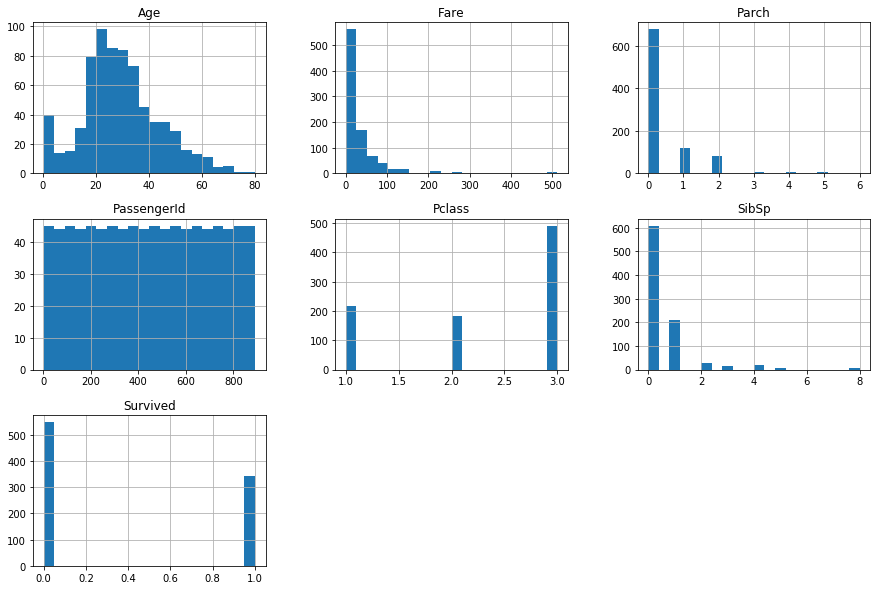

In [100]:
titanic.hist(bins=20, figsize=(15,10))
plt.show()

---
### Data Exploration
<b>Use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch (Parents/children aboard), and Fare to predict whether a passenger survived. </b>

In [101]:
# Cretae dataframe with given features 
# Decide Independant and Dependnat variables and clean data
df = titanic[['Survived','Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare']]
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.8+ KB


In [103]:
# Fill NA/NULL values with Mean for numerical datatatype features
df=df.fillna(df.mean())

# Convert Sex to Bironary or numaric Data
df['Sex'] = pd.get_dummies(df['Sex'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null uint8
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
dtypes: float64(2), int64(4), uint8(1)
memory usage: 42.7 KB


---
### Decision Tree Model

In [104]:
# Target or Dependant variables
df_features=df[['Pclass','Sex','Age','SibSp','Parch','Fare']]
df_target=df['Survived']

#Split the Train and Test Data
X_train, X_test, y_train, y_test = train_test_split(df_features,df_target, test_size = 0.30)

#Initiate Decision Tree Classifier and Fit
clf = DecisionTreeClassifier(criterion = 'entropy', 
                             splitter='best', 
                             min_samples_split=80,
                             max_depth=8,
                             random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=80,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

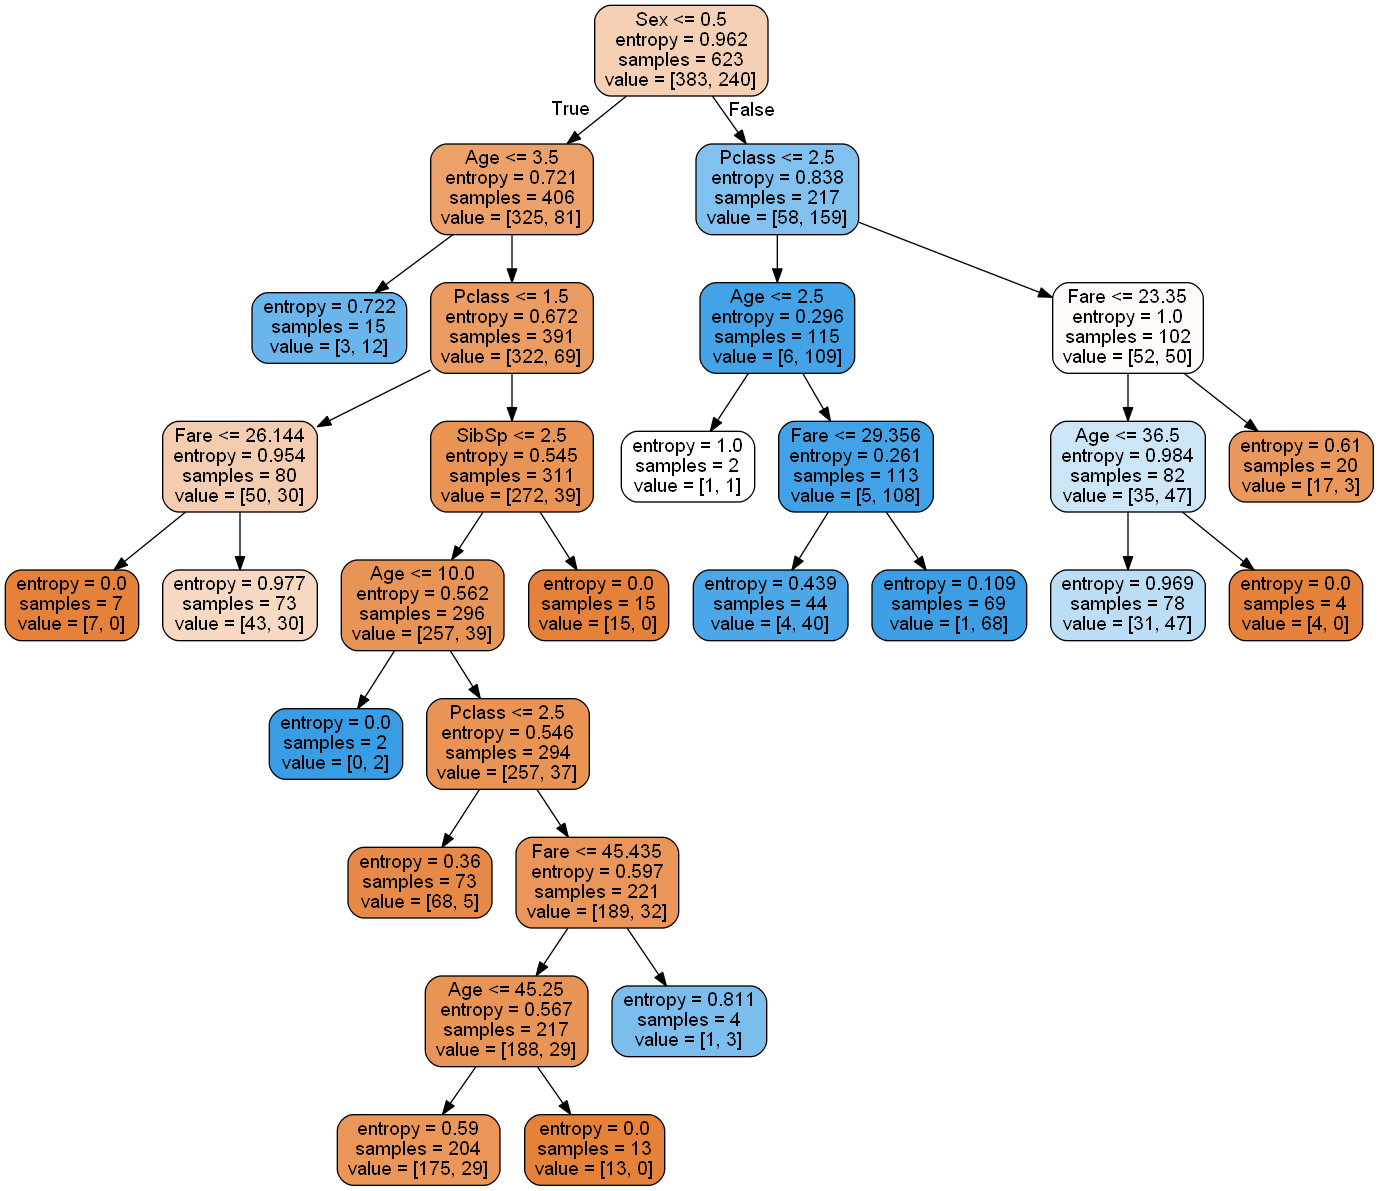

In [105]:
#Show in the tree graphice to evaluate the model
dot_data = tree.export_graphviz(clf, 
                                out_file=None, 
                                filled=True, 
                                rounded=True, 
                                feature_names=['Pclass','Sex','Age','SibSp','Parch','Fare'])
graph = pydotplus.graph_from_dot_data(dot_data)  

#graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [106]:
# Print Decision Tree Cross Validation Score for Train Data
print('Train Set :',clf.score(X_train, y_train))

# Print Decision Tree Score for Test Data
print('Test Set:  ',clf.score(X_test, y_test))

Train Set : 0.826645264847512
Test Set:   0.8507462686567164


---
<b> Now, we will make prediction based on the Decision Tree Model

In [107]:
# For the inut feature we are getting feature of an random passanger and passing the feature 
# to get the Predicted Survival (later we can compare with actual as we it is known here)
predicted_survival=clf.predict(np.array(df_features[1:2]))

print('Predicted Survival:\t\t', predicted_survival)
print('Actual Survival(from Dataset):\t', df['Survived'][1:2].values[0])

Predicted Survival:		 [1]
Actual Survival(from Dataset):	 1
